# 06-1 군집 알고리즘

군집 : 비슷한 샘플끼리 그룹으로 모으는 작업

클러스터 : 군집 알고리즘에서 만든 그룹

비지도 학습 과일분류

방법1. 사진의 픽셀값의 평균을 구하여 비슷한 과일끼리 모으기

**과일 사진 데이터 준비하기**

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-07-26 04:00:07--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-26 04:00:07--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-26 04:00:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#넘파이에서 npy파일 로드
fruits = np.load('fruits_300.npy')

In [3]:
print(fruits.shape) #(샘플 수) X (이미지 높이) X (이미지 넓이)

(300, 100, 100)


In [4]:
#첫 번째 이미지의 첫 번째 행 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


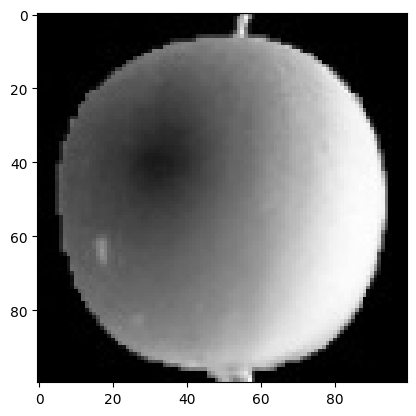

In [5]:
#첫 번째 이미지 그림으로 출력
plt.imshow(fruits[0], cmap = 'gray')
plt.show()

바탕이 어둡고 물체가 밝은 이유
- 컴퓨터는 높은 픽셀값(밝은 부분)에 집중하므로 기본 이미지는 바탕이 밝고 물체가 어둡지만 물체에 집중시키기 위해 이를 반전시킴


픽셀값 높으면 밝은 것

픽셀값 낮으면 어두운 것

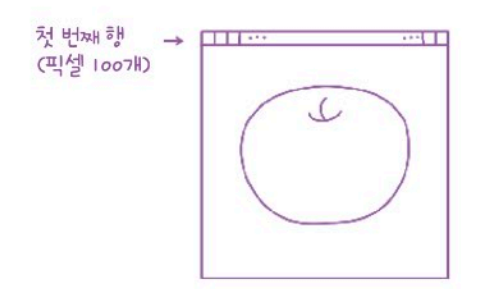

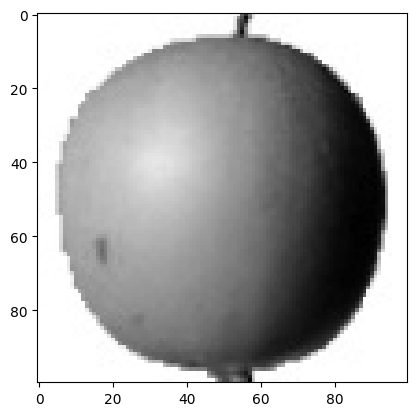

In [6]:
# 그림 반전
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

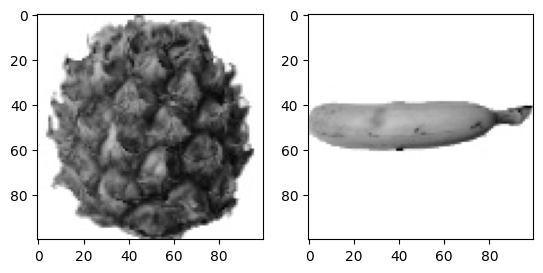

In [7]:
fig, axs = plt.subplots(1,2) #하나의 행과 2개의 열 지정
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')
plt.show()


**픽셀값 분석하기**

100X100 의 이미지 데이터 하나를 1X10000의 1차원 배열로 변환(계산의 편의를 위헤)

In [8]:
apple = fruits[0:100].reshape(-1, 10000) #사과 데이터 모두 선택, 2차원 배열로 변환
pineapple = fruits[100:200].reshape(-1, 10000)
banana = fruits[200:300].reshape(-1, 10000)

print(apple.shape)

(100, 10000)


샘플별 평균값 계산

In [9]:
print(apple.mean(axis = 1)) #샘플 마다 평균값 계산 (행 방향)

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


**히스토그램 그리기**

값이 발생한 빈도를 그래프로 표시

x축 : 구간
y축 : 빈도

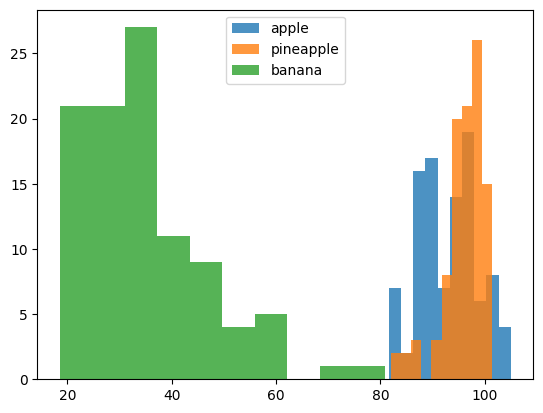

In [10]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.8) #투명도 0.8로 줄이기
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

바나나 : 평균값이 40아래에 집중되어 있음
->바나나는 사진에서 차지하는 영역이 작기 때문

사과, 파인애플 : 90~100 사이에 모여 있음
-> 둘 다 형태가 동그랗고 사진에서 차지하는 크기도 비슷하기 때문

샘플의 평균값의 문제점

1. 파인애플과 사과 구별 어려움
2. 바나나 또한 확대한 사진이라면 구별하기 어려워질것임

픽셀별 평균값 계산

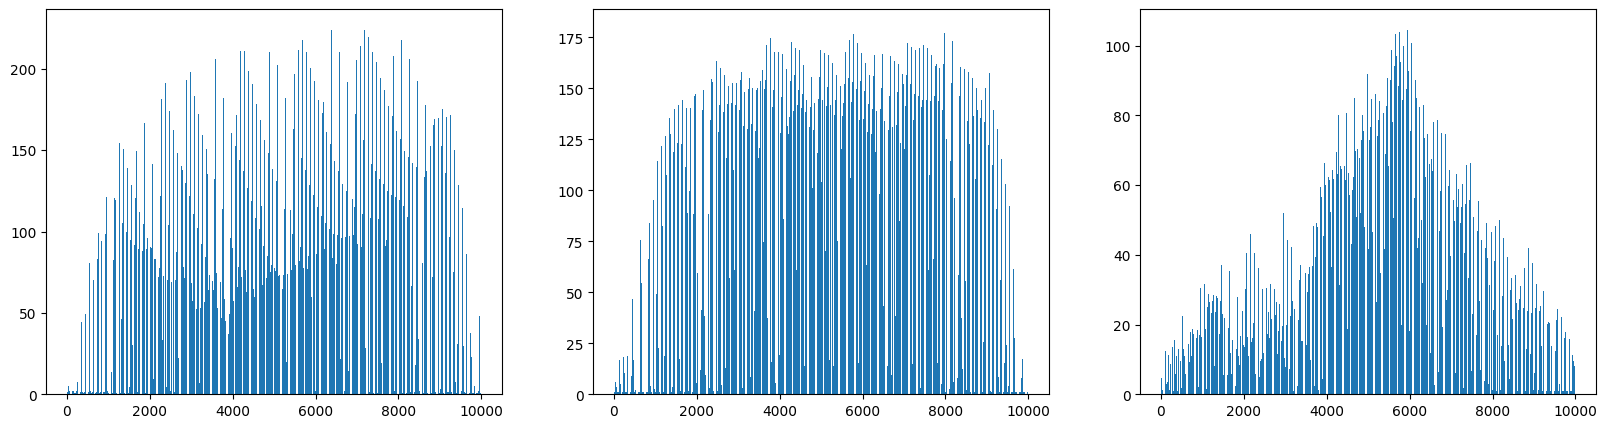

In [11]:
fig, axs = plt.subplots(1,3, figsize = (20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0 )) #막대 그래프 그리기 #(열 방향)
axs[1].bar(range(10000), np.mean(pineapple, axis = 0 ))
axs[2].bar(range(10000), np.mean(banana, axis = 0 ))
plt.show()

사과 : 사진 아래쪽으로 갈수록 값이 높아짐

파인애플 : 비교적 고르면서 높음

바나나 : 중앙 픽셀값이 높음

픽셀을 평균 낸 이미지와 비교

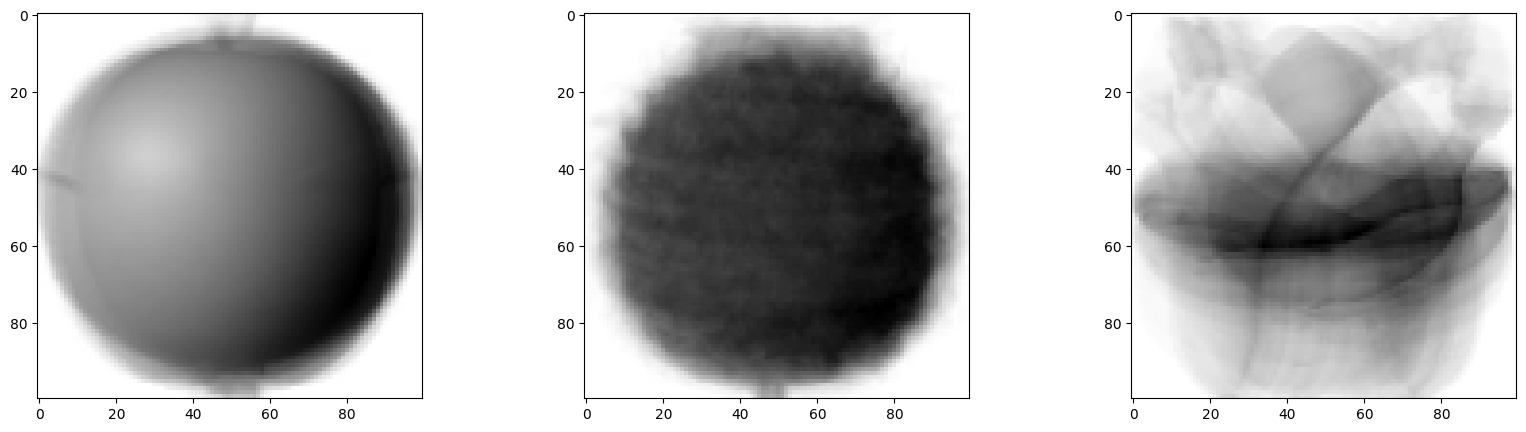

In [12]:
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)
fig, axs = plt.subplots(1,3,figsize = (20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

**평균값과 가까운 사진 고르기**

apple_mean 과 가장 가까운 사진 고르기
> 오차 절댓값의 평균 사용

In [13]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2)) #샘플 별 평균 구하기
print(abs_mean.shape) #각 샘플의 오차 평균값

(300,)


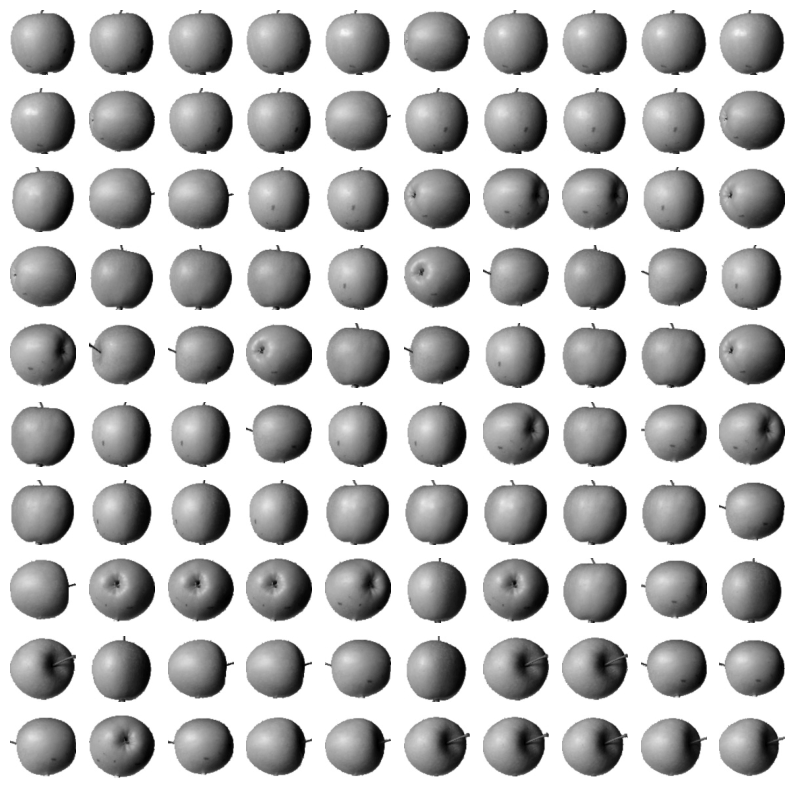

In [14]:
#오차값 작은 순서대로 100개 사진 나타내기
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap ='gray_r')
    axs[i, j].axis('off')
plt.show()

banana_mean과 비슷한 사진 100장 출력하기

In [15]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis = (1,2)) #샘플 별 평균 구하기
print(abs_mean.shape) #각 샘플의 오차 평균값

(300,)


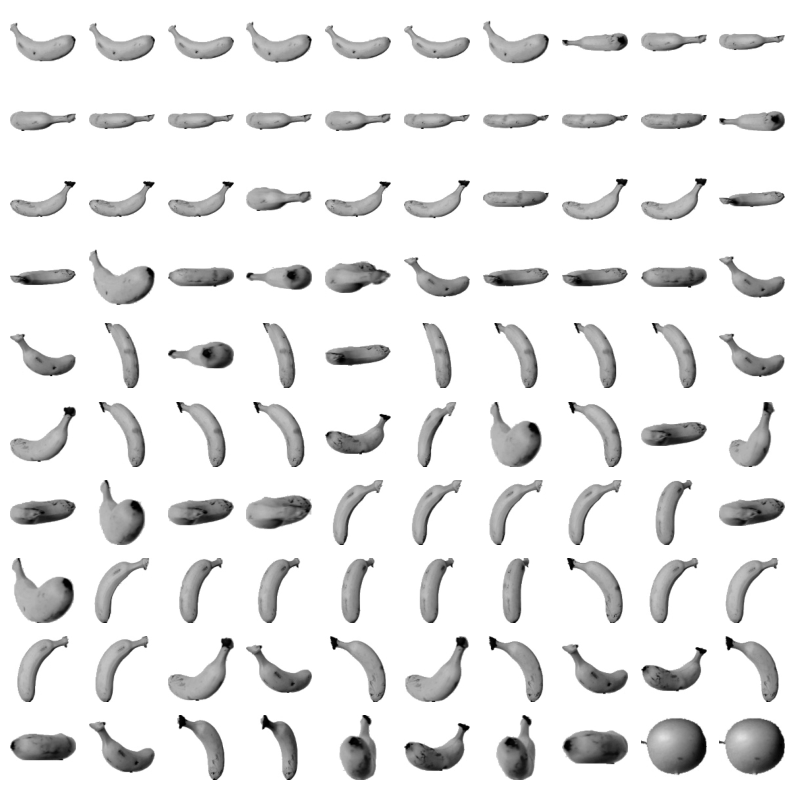

In [16]:
#오차값 작은 순서대로 100개 사진 나타내기
banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap ='gray_r')
    axs[i, j].axis('off')
plt.show()

위 알고리즘의 한계 : 타깃값을 전혀 모르는 경우 평균값을 계산할 수 없음
* 위는 임의의 샘플과 타깃값을 알고 있는 것

# 06-2 k-평균

평균값(=클러스터 중심)을 자동으로 찾아주는 알고리즘

작동방식
> 1. 무작위로 k개의 클러스터 중심을 정한다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.

* 3번 과정에서 클러스터 안에서 더 많은 종류로 쏠리게 됨
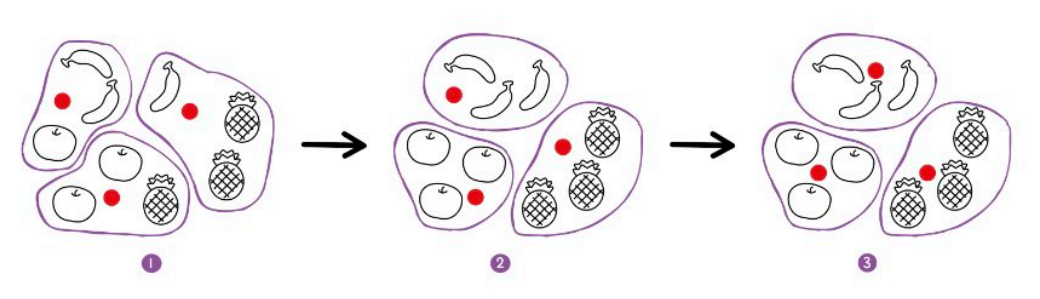

Q. 애초에 같은 레이블끼리 모여 있어야 하는가?
no. 위 그림은 예시, 비슷한 특성끼리 모이게 되어 있음

**KMeans 클래스**


In [17]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 10000)

--2023-07-26 04:01:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-26 04:01:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-26 04:01:14--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

Q. KMeans 클래스가 2차원이어야 하는 이유는?
계산 편해서?

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [20]:
#각 클러스터 별 샘플 개수 출력
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [21]:
#각 클러스터의 이미지를 확인하는 함수
def draw_fruits(arr, ratio = 1):
  n = len(arr) #샘플 개수
  #한 줄에 10개씩 이미지 그리기.
  rows = int(np.ceil(n/10))
  #rows == 1 이면 열의 개수는 샘플 개수, 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: #n까지만 그리기
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

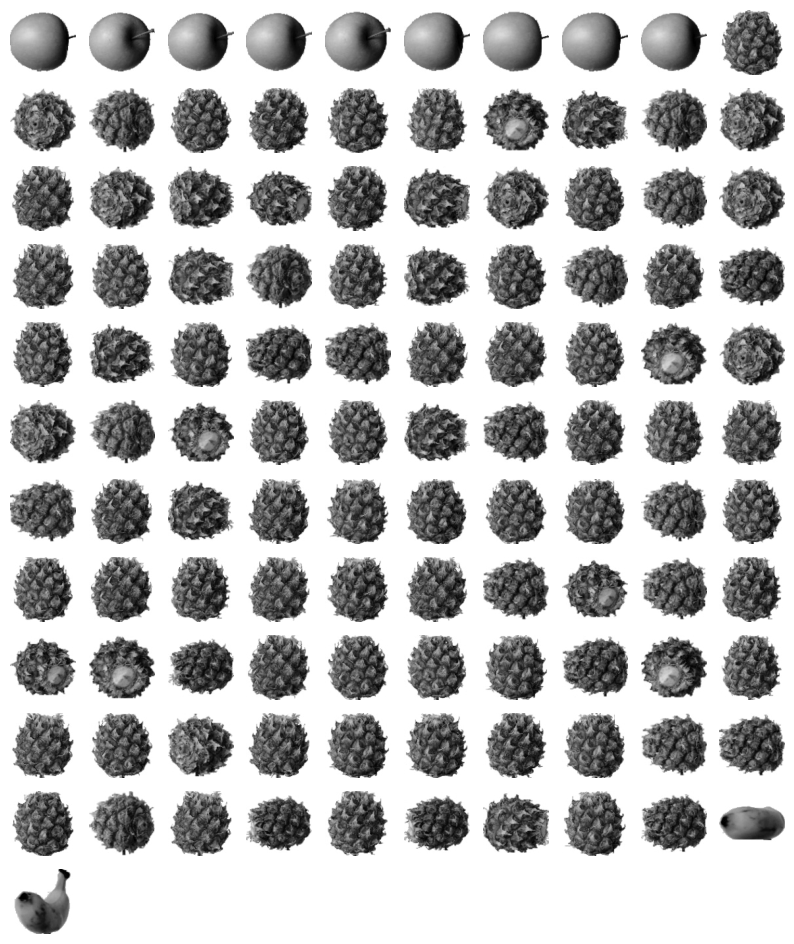

In [22]:
#레이블 0인 과일 사진 모두 출력
draw_fruits(fruits[km.labels_==0])

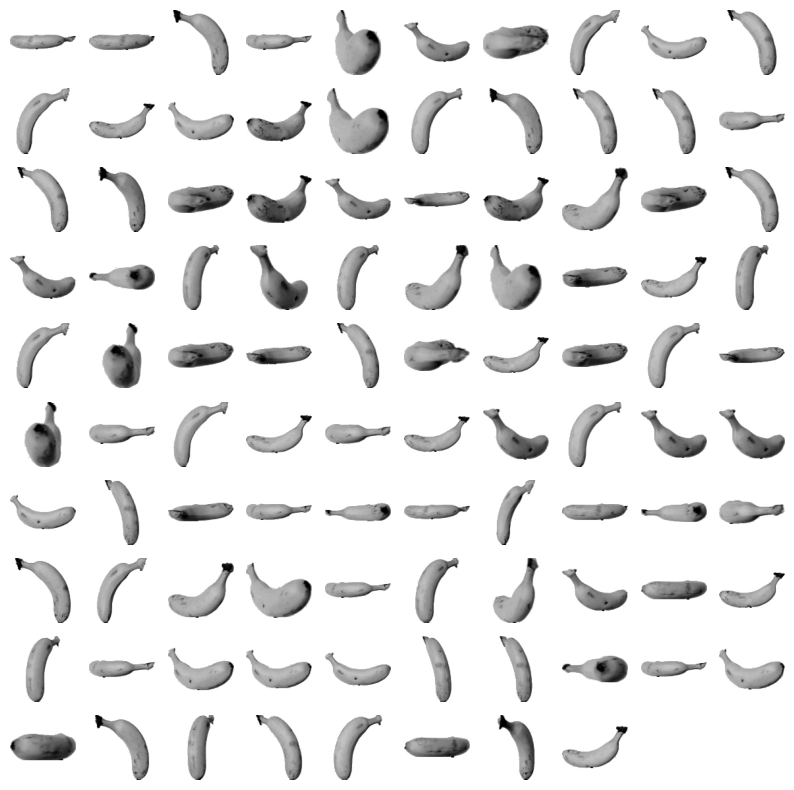

In [23]:
draw_fruits(fruits[km.labels_==1])

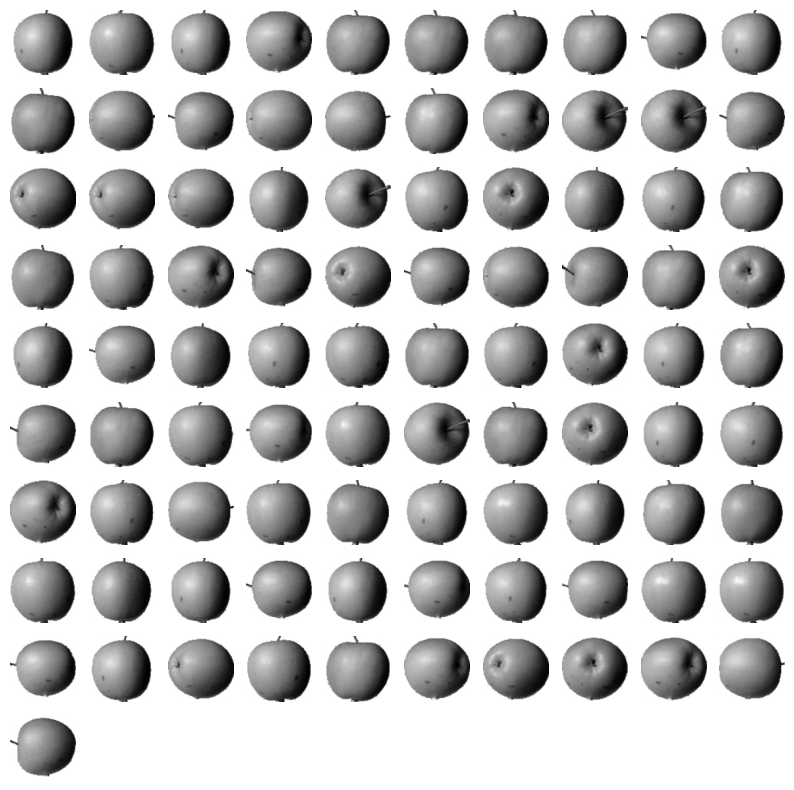

In [24]:
draw_fruits(fruits[km.labels_==2])

k-means 한계

2. 데이터에 이상치가 들어있을

**클러스터 중심**

중심의 크기도 fruits_2d 처럼 1X10000

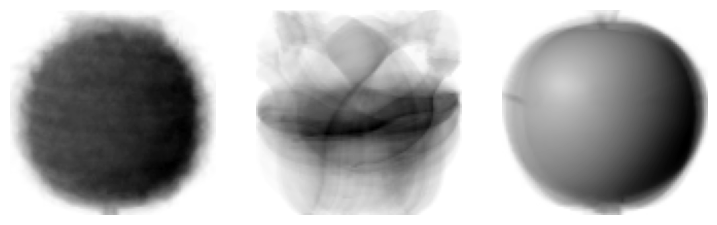

In [25]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

In [26]:
#훈련 데이터 샘플에서 각 클러스터 중심까지 거리로 변환
print(km.transform(fruits_2d[100:101])) #레이블 2에 속하는 샘플

[[3393.8136117  8837.37750892 5267.70439881]]


클러스터 중심까지 거리를 특성으로 사용하여 훈련 데이터의 차원을 크게 줄일 수 있음(10000 ->3)-> 속도 향상

In [27]:
print(km.predict(fruits_2d[100:101]))

[0]


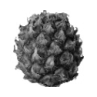

In [28]:
draw_fruits(fruits[100:101])

In [29]:
#알고리즘의 반복 횟수(k변경된 횟수)
print(km.n_iter_)

4


k_mean 장점

1. 클러스터 중심을 특성공학처럼 사용해 데이터셋을 저차원(10000->4) 로 줄임

**최적의 k 찾기 - 엘보우 방법**

클러스터 개수를 늘려가면서 이너셔가 꺾이는 지점을 관찰
- 이너셔 : 클러스터 중심과 그에 속한 샘플들의 거리 제곱 합(클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 값)
> 클러스터 개수가 늘어난다면 개개의 크기는 줄어들어 이너셔 값도 줄어듬
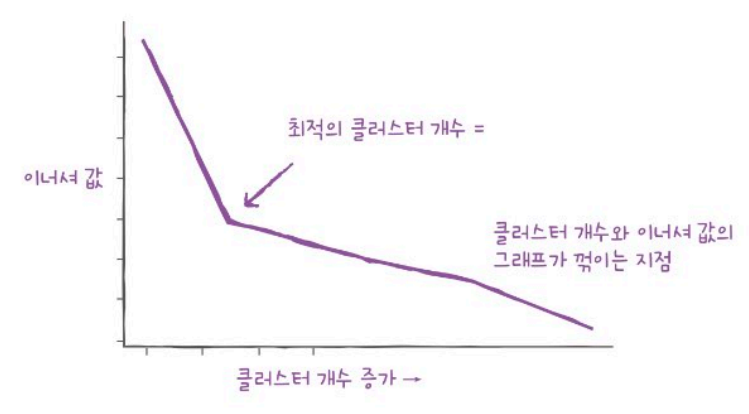

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

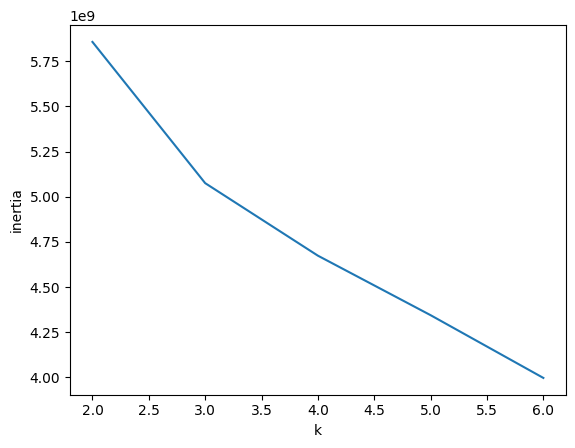

In [30]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

k=3 이 엘보우 지점

k값이 커져서 엘보우 값 너무 작아진다면 문제점?
과대적합?

# 06-3. 주성분 분석(PCA)

차원 축소 알고리즘
- 데이터를 가장 잘 나타내는 일부 특성을 선택
- 원본 차원으로 복원도 가능
- 저장 공간 부족 문제 해결

1. 분산이 가장 큰 방향을 찾는다
2. 샘플 데이터를 주성분에 정사영 하여 차원을 줄인다.
3. 첫 번째 주성분에 수직이고 분산이 가장 큰 다음 방향을 두번째 주성분으로 한다.
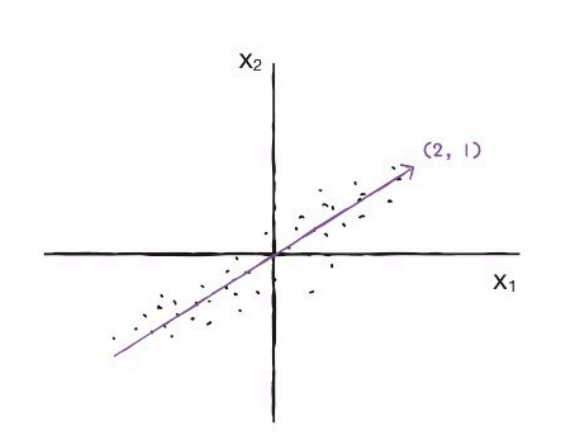
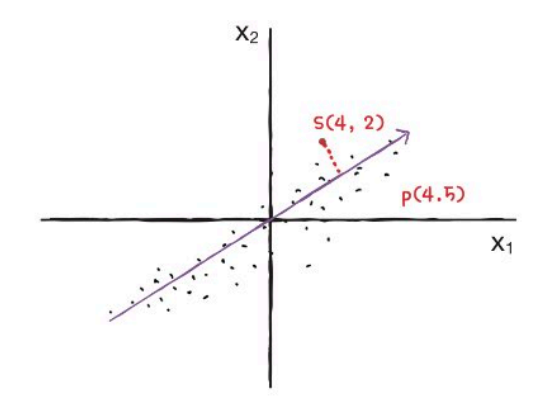

주성분 벡터의 원소 개수 = 원본 데이터셋의 특성 개수

분산이 큰 방향이기 때문에 원본의 특성을 가장 잘 반영

**PCA 클래스**


In [31]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 10000)

--2023-07-26 04:01:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-26 04:01:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-26 04:01:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) #주성분 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [33]:
print(pca.components_.shape)

(50, 10000)


50개의 주성분, 각각 10000개의 특성(원본 데이터와 같음)

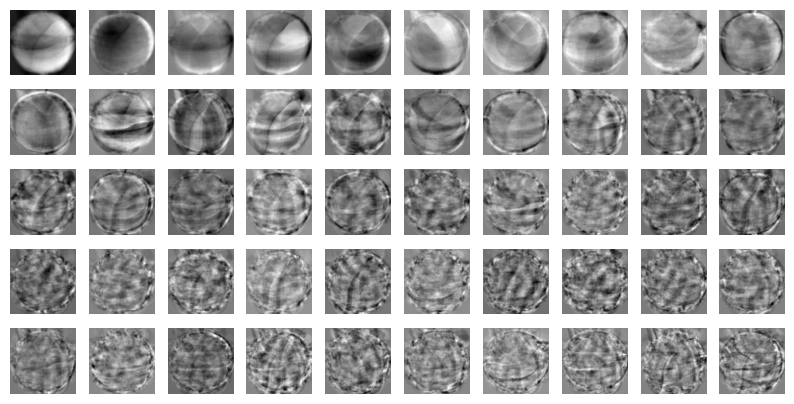

In [34]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
- 원본 데이터를 주성분에 투영하여 특성의 개수를 50개로 줄임

Q. 주성분 하나는 한 차원?

In [35]:
print(fruits_2d.shape)

(300, 10000)


In [36]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


**원본 데이터 재구성**



In [37]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


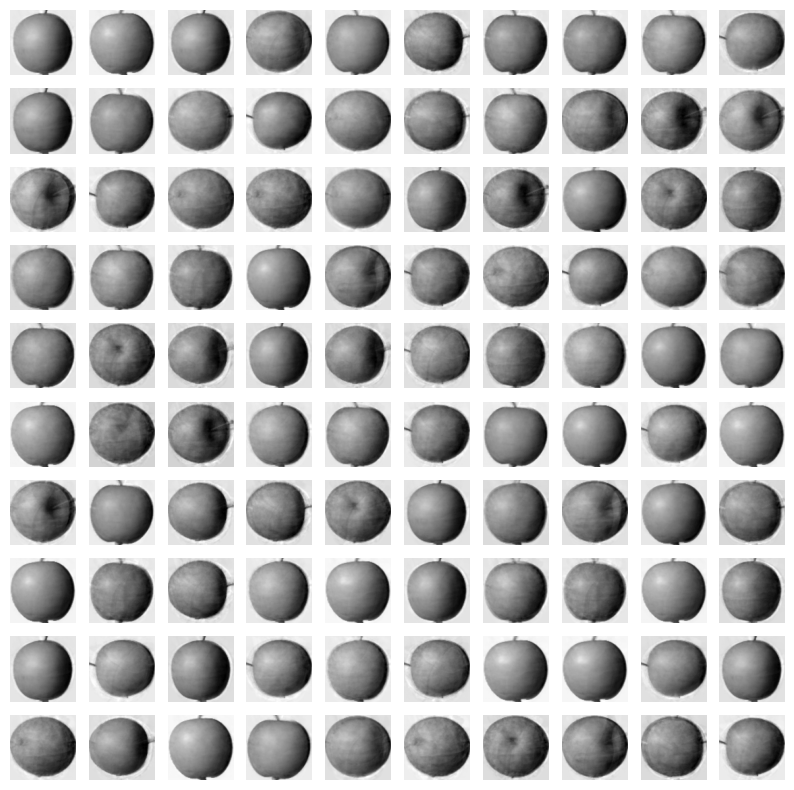

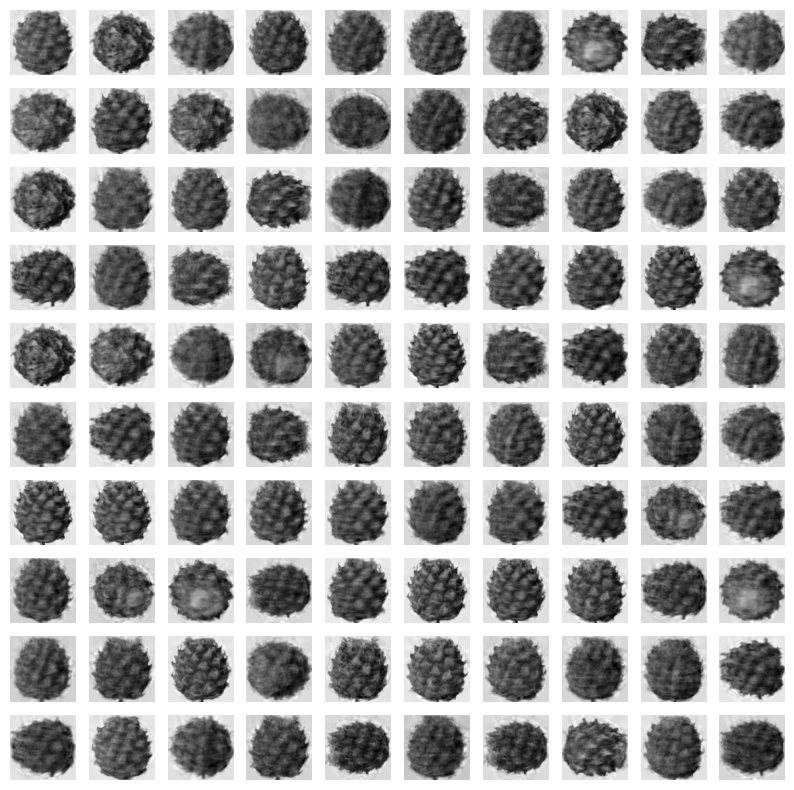

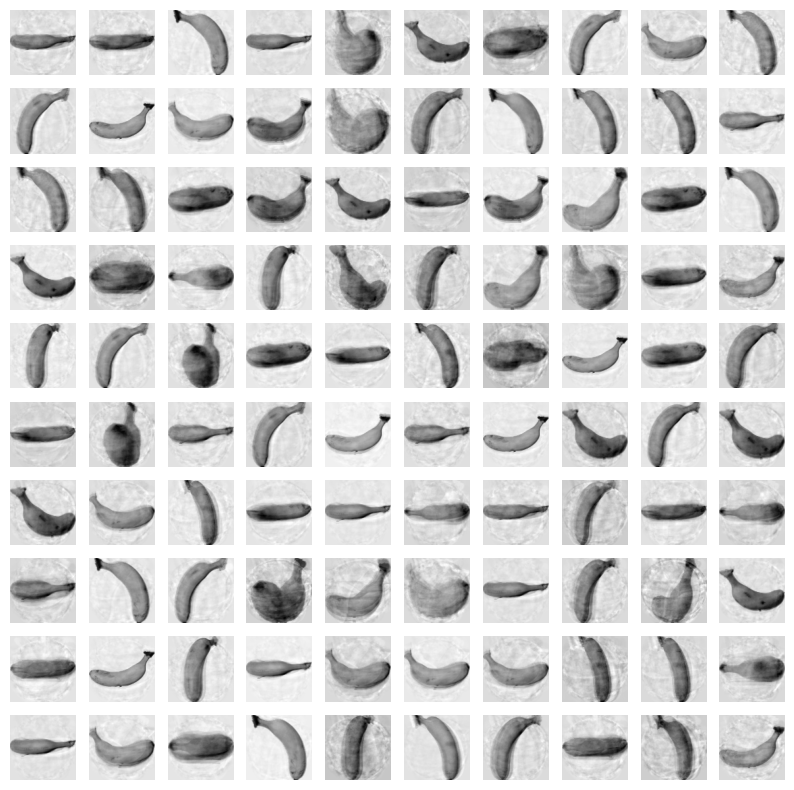

In [38]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

주성분 많이 사용할수록 더 잘 복

Q. 복원 방법?

**설명된 분산**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [39]:
print(np.sum(pca.explained_variance_ratio_))

0.921445382363271


92%가 넘는 분산을 유지

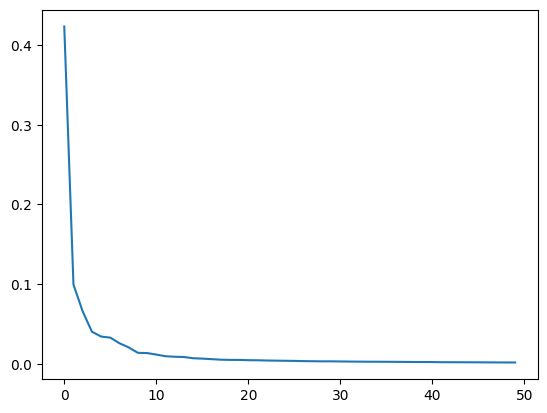

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산 표현

**다른 알고리즘과 함께 사용하기**

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도학습에 적용했을 때, 어떤 차이가 있나 확인하기

In [41]:
#로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [42]:
target = np.array([0]*100 + [1]*100 + [2] *100)

In [43]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.3005911350250243


In [44]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.05809917449951172


정확도 100프로, 시간 20배 이상 감소

In [45]:
# 원하는 설명된 분산 비율 입력하여 주성분 개수 자동으로 찾기
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [46]:
print(pca.n_components_) #2개의 주성분 찾음

2


In [47]:
#원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [48]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.0340179443359375


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

차원 축소된 데이터를 k-평균 알고리즘에 적용

In [49]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


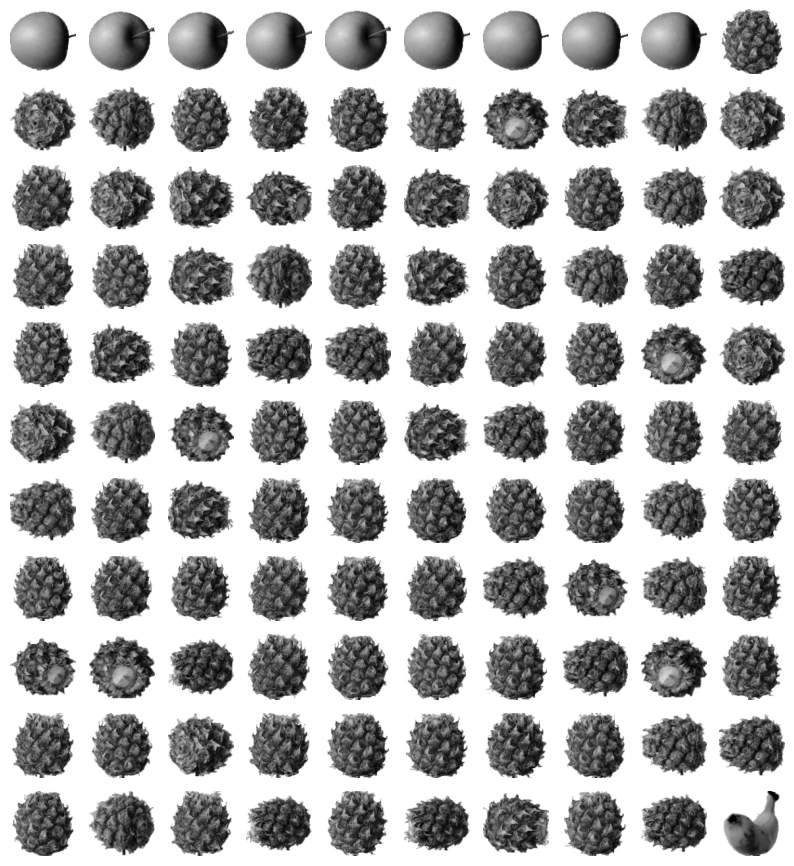

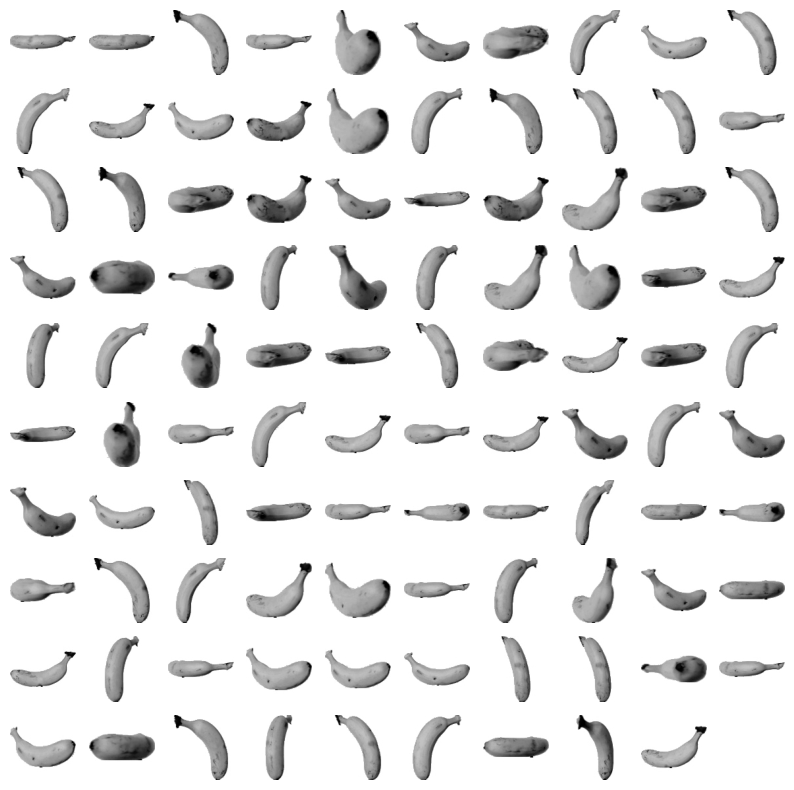

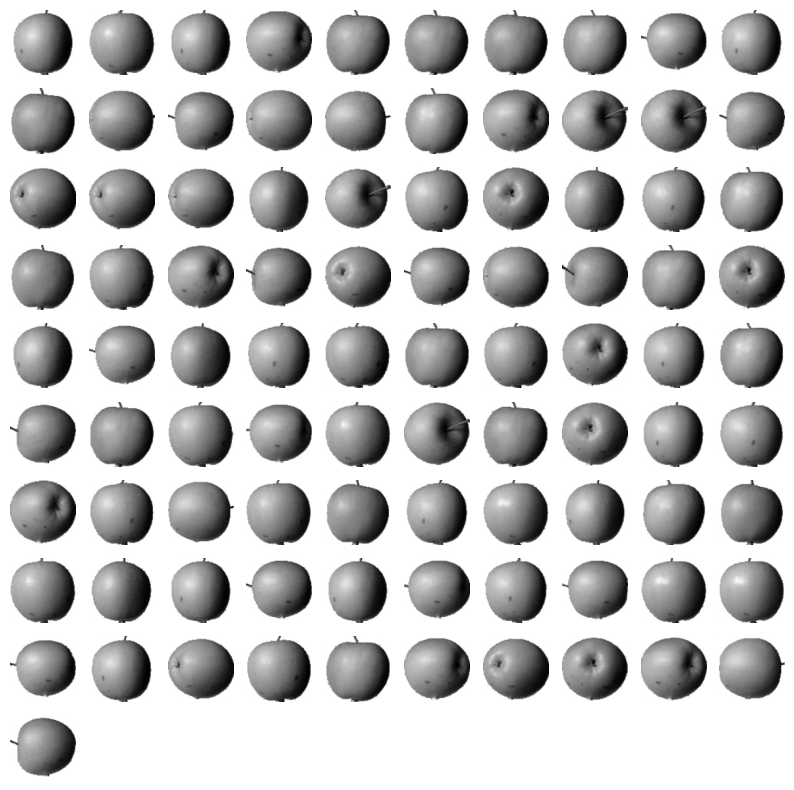

In [51]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

차원 축소 장점
1. 시각화하기 쉽다
2. 데이터셋의 크기를 줄여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.

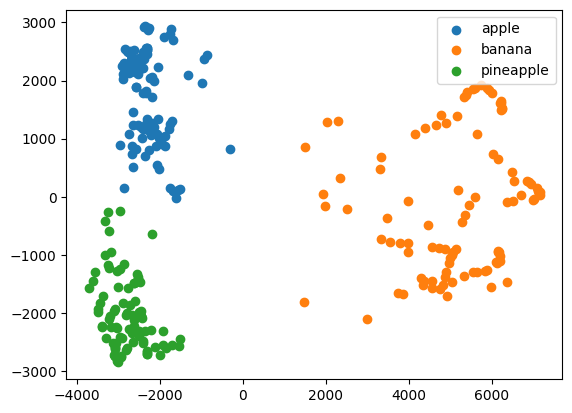

In [52]:
#시각화
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()


사과와 파인애플의 경계가 가까워 몇 개의 데이터가 잘못 구분되었던 것

산점도 상으로도 세 종류 모두 잘 구분되어있음